- Identify the top 1% outliers: adopt at least three different methods from different families (e.g., density-based, angle-based…) and compare the results. 
- Visualize the outliers in a 2 or 3d scatter plot using at least one dimensionality reduction technique.
- Deal with the outliers in a way you see fit, e.g. by removing them from the dataset or by treating the anomalous variables as missing values and employing replacement techniques. In this second case, you should check that the outliers are not outliers anymore. Justify your choices in every step.

In [346]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#LOF
from sklearn.neighbors import LocalOutlierFactor

from collections import Counter
from collections import defaultdict

In [347]:
#!pip install scikit-plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc_curve
from sklearn.model_selection import KFold, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

In [348]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [349]:
#df_test = pd.read_csv("/content/Test_ripulito")
#df_test = df_test.drop(columns=['Unnamed: 0'], axis = 1)
df_train = pd.read_csv("/content/Train_ripulito")
df_train = df_train.drop(columns=['Unnamed: 0'], axis = 1)

In [350]:
df_train_copy = df_train
#df_test_copy = df_test

In [351]:
t_train = df_train.drop(columns=['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'], axis = 1)
#t_test = df_test.drop(columns=['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'], axis = 1)

In [352]:
columns_train = []
columns_train = t_train.columns
#columns_test = []
#columns_test = t_test.columns

In [353]:
#normalizzazione sia su test sia su train
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(t_train)
#print(x_train_norm)
#x_test_norm = scaler.transform(t_test)
#print(x_test_norm)

In [354]:
df_trainNORM = pd.DataFrame(x_train_norm, columns = columns_train)
#df_testNORM = pd.DataFrame(x_test_norm, columns = columns_test)

In [355]:
df_trainNORM = df_trainNORM.assign(emotion = df_train_copy['emotion'].values)
df_trainNORM = df_trainNORM.assign(vocal_channel = df_train_copy['vocal_channel'].values)
df_trainNORM = df_trainNORM.assign(statement = df_train_copy['statement'].values)
df_trainNORM = df_trainNORM.assign(repetition = df_train_copy['repetition'].values)
df_trainNORM = df_trainNORM.assign(sex = df_train_copy['sex'].values)
df_trainNORM = df_trainNORM.assign(filename = df_train_copy['filename'].values)
df_trainNORM = df_trainNORM.assign(emotional_intensity = df_train_copy['emotional_intensity'].values)

"""df_testNORM = df_testNORM.assign(vocal_channel = df_test_copy['vocal_channel'].values)
df_testNORM = df_testNORM.assign(statement = df_test_copy['statement'].values)
df_testNORM = df_testNORM.assign(repetition = df_test_copy['repetition'].values)
df_testNORM = df_testNORM.assign(sex = df_test_copy['sex'].values)
df_testNORM = df_testNORM.assign(filename = df_test_copy['filename'].values)
df_testNORM = df_testNORM.assign(emotional_intensity = df_test_copy['emotional_intensity'].values)
df_testNORM = df_testNORM.assign(emotion = df_test_copy['emotion'].values)"""


"df_testNORM = df_testNORM.assign(vocal_channel = df_test_copy['vocal_channel'].values)\ndf_testNORM = df_testNORM.assign(statement = df_test_copy['statement'].values)\ndf_testNORM = df_testNORM.assign(repetition = df_test_copy['repetition'].values)\ndf_testNORM = df_testNORM.assign(sex = df_test_copy['sex'].values)\ndf_testNORM = df_testNORM.assign(filename = df_test_copy['filename'].values)\ndf_testNORM = df_testNORM.assign(emotional_intensity = df_test_copy['emotional_intensity'].values)\ndf_testNORM = df_testNORM.assign(emotion = df_test_copy['emotion'].values)"

In [356]:
train_happy = []
for value in df_trainNORM['emotion']:
  if(value == 'happy'):
    train_happy.append(1)
  else:
    train_happy.append(0)

In [357]:
df_trainNORM = df_trainNORM.assign(happy = train_happy)

In [358]:
"""test_happy = []
for value in df_testNORM['emotion']:
  if(value == 'happy'):
    test_happy.append(1)
  else:
    test_happy.append(0)"""

"test_happy = []\nfor value in df_testNORM['emotion']:\n  if(value == 'happy'):\n    test_happy.append(1)\n  else:\n    test_happy.append(0)"

In [359]:
#df_testNORM = df_testNORM.assign(happy = test_happy)

In [360]:
"""X_train = df_trainNORM.drop(columns = ['happy', 'emotion', 'vocal_channel', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'])
y_train = df_trainNORM[['happy']]
X_test = df_testNORM.drop(columns = ['happy', 'emotion','vocal_channel','emotional_intensity', 'statement', 'repetition', 'sex', 'filename'])
y_test = df_testNORM[['happy']]"""
#0 not happy e 1 happy

"X_train = df_trainNORM.drop(columns = ['happy', 'emotion', 'vocal_channel', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'])\ny_train = df_trainNORM[['happy']]\nX_test = df_testNORM.drop(columns = ['happy', 'emotion','vocal_channel','emotional_intensity', 'statement', 'repetition', 'sex', 'filename'])\ny_test = df_testNORM[['happy']]"

Outliers Detection sul TRAIN normalizzato e originale (ovvero solo ripulito con la data preparation)

Boxplot - IQR score

In [361]:
#function that detect outliers based on IQR 
def outlier_detector(var):
    ''' function that calculates Q1,Q3,IQR and return the number of outliers of a given variable'''
    Q1=df_trainNORM[var].quantile(0.25)
    Q3=df_trainNORM[var].quantile(0.75)
    IQR=Q3-Q1
    
    print('{}:'.format(var))
    print('Q1: {}\nQ3: {}\nIQR: {}'.format(Q1,Q3,IQR))
    
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    
    print('lower range: {}\nupper range: {}'.format(lower_whisker,upper_whisker))
    outliers = sum(df_trainNORM[var]<lower_whisker) + sum(df_trainNORM[var]>upper_whisker)
    print('{} has {} potential outliers'.format(var,outliers))
    


    #function that removes outliers
def outlier_remove(variable,u_whisker, l_whisker):
    df_trainNORM_clean = df_trainNORM_clean.drop(index=df_trainNORM[df_trainNORM[variable]< l_whisker].index, inplace=True)
    df_trainNORM_clean = df_trainNORM_clean.drop(index=df_trainNORM[df_trainNORM[variable]> u_whisker].index, inplace=True)
    

In [362]:
df_trainNORM.shape

(1828, 205)

In [363]:
for col in df_trainNORM.iloc[:,:197].columns:
    outlier_detector(var=col)
    print('\n')

sum:
Q1: -0.03922059673409412
Q3: 0.020242054682704395
IQR: 0.05946265141679852
lower range: -0.1284145738592919
upper range: 0.10943603180790218
sum has 393 potential outliers


std:
Q1: -0.6584639557359242
Q3: 0.2809788856602912
IQR: 0.9394428413962155
lower range: -2.067628217830247
upper range: 1.6901431477546145
std has 123 potential outliers


q25:
Q1: -0.11057418607233217
Q3: 0.5474610129703439
IQR: 0.658035199042676
lower range: -1.0976269846363462
upper range: 1.534513811534358
q25 has 178 potential outliers


q50:
Q1: -0.06310638795070432
Q3: -0.06310638795070432
IQR: 0.0
lower range: -0.06310638795070432
upper range: -0.06310638795070432
q50 has 22 potential outliers


q75:
Q1: -0.6660004714001446
Q3: 0.3050166427190317
IQR: 0.9710171141191763
lower range: -2.1225261425789093
upper range: 1.7615423138977964
q75 has 119 potential outliers


kur:
Q1: -0.6948362859510616
Q3: 0.419522554354851
IQR: 1.1143588403059126
lower range: -2.3663745464099306
upper range: 2.09106081481371

In [364]:
def is_outlier(x, k=1.5):
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3 - q1
    outliers = list()
    for v in x:
        if v < q1 - k * iqr or v > q3 + k * iqr:
            outliers.append(True)
        else:
            outliers.append(False)
    return np.array(outliers)

lag1_sum_w1 --> più di 700 potenziali outliers

In [365]:
outliers = is_outlier(df_trainNORM['lag1_sum_w1'], k=1.5)
np.unique(outliers, return_counts=True)

(array([False,  True]), array([1094,  734]))

Box Plot di lag1_sum_w1

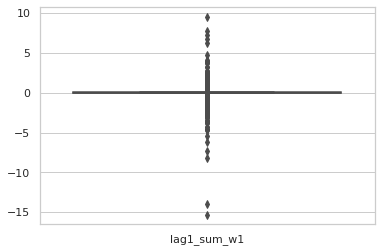

In [366]:
plt.figure(figsize=(6,4))
sns.set_style(style="whitegrid")
sns.set_color_codes()

sns.boxplot(data=df_trainNORM[['lag1_sum_w1']])
sns.set(rc={'figure.figsize':(15,19.27)})

questi outliers (ovvero quando sum > 1 e sum < -1) sono presenti quasi sempre quando happy = 0. (solo 5/6 sono presenti quando happy = 1)

In [367]:
df_trainNORM[df_trainNORM['lag1_sum_w4']>1]

,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_q25,lag1_kur,...,stft_kur_w4,stft_skew_w4,emotion,vocal_channel,statement,repetition,sex,filename,emotional_intensity,happy
76,-0.020684,0.763718,-1.201033,-0.063106,1.689233,-0.646284,1.054349,0.103300,-1.055734,-0.504075,...,-1.042321,0.291313,happy,song,Kids are talking by the door,1st,M,03-02-03-02-01-01-01.wav,strong,1
93,0.101178,1.301351,-4.284397,-0.063106,2.247051,-0.787366,1.639480,0.672298,-4.136484,-0.759947,...,-0.340928,1.667482,angry,song,Kids are talking by the door,2nd,M,03-02-05-02-01-02-01.wav,strong,0
95,0.218022,1.667275,-5.337254,-0.063106,2.350351,-0.718281,1.406413,-0.541565,-3.781013,-0.619519,...,-0.331477,1.398883,angry,song,Dogs are sitting by the door,2nd,M,03-02-05-02-02-02-01.wav,strong,0
168,0.033810,-0.253016,-0.618201,-0.063106,0.139737,-0.792006,0.986203,0.027433,-0.463282,-0.760347,...,-1.048951,1.987945,calm,song,Kids are talking by the door,1st,F,03-02-02-01-01-01-02.wav,normal,0
192,0.018085,0.825005,-0.392589,-0.063106,-0.046202,0.599411,1.344765,-0.048433,-0.581773,-0.630404,...,0.927878,-0.708807,angry,song,Kids are talking by the door,1st,F,03-02-05-01-01-01-02.wav,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,-0.083425,-0.166924,0.133839,-0.063106,-0.190822,-0.994599,0.078413,0.027433,0.010679,0.170730,...,-0.217799,-0.595022,angry,song,Dogs are sitting by the door,2nd,F,03-02-05-01-02-02-16.wav,normal,0
1653,0.002551,0.785859,-0.467793,-0.063106,0.222377,-0.449279,0.849787,0.027433,-0.581773,-0.837493,...,0.306899,-0.925844,angry,song,Kids are talking by the door,2nd,F,03-02-05-02-01-02-16.wav,strong,0
1654,0.016491,0.811028,-0.599400,-0.063106,0.181057,-0.639677,0.767117,0.027433,-0.700263,-0.576799,...,-0.008948,-0.232555,angry,song,Dogs are sitting by the door,1st,F,03-02-05-02-02-01-16.wav,strong,0
1659,-0.039023,-0.325505,0.209043,-0.063106,0.366996,-1.201997,-0.597911,0.027433,-0.107811,0.484886,...,-0.863749,0.928052,fearful,song,Dogs are sitting by the door,2nd,F,03-02-06-01-02-02-16.wav,normal,0


In [368]:
df_trainNORM[df_trainNORM['lag1_sum_w4']<-1]

,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_q25,lag1_kur,...,stft_kur_w4,stft_skew_w4,emotion,vocal_channel,statement,repetition,sex,filename,emotional_intensity,happy
78,0.013356,0.606527,-2.573506,-0.063106,1.399993,-1.044896,1.194268,0.027433,-1.529696,-0.646592,...,-0.787175,-0.029422,happy,song,Dogs are sitting by the door,1st,M,03-02-03-02-02-01-01.wav,strong,1
87,0.026085,0.074326,-1.370242,-0.063106,0.077757,-0.946301,0.856558,0.027433,-0.463282,-0.906401,...,-0.645722,-0.472291,sad,song,Dogs are sitting by the door,2nd,M,03-02-04-02-02-02-01.wav,strong,0
90,0.024344,0.621408,-1.144629,-0.063106,0.408316,-0.709199,1.279590,0.065366,-0.700263,-0.764909,...,-0.201376,0.174520,angry,song,Dogs are sitting by the door,1st,M,03-02-05-01-02-01-01.wav,normal,0
176,0.041403,0.171247,-1.088226,-0.063106,0.201717,-0.709312,1.336974,0.027433,-1.055734,-0.756790,...,-0.824494,-0.182069,happy,song,Kids are talking by the door,1st,F,03-02-03-01-01-01-02.wav,normal,1
178,0.008514,0.089587,-0.354987,-0.063106,-0.025542,-0.630952,0.557680,0.027433,-0.344792,-0.866401,...,-0.063856,-0.911627,happy,song,Dogs are sitting by the door,1st,F,03-02-03-01-02-01-02.wav,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,-0.020944,0.329918,-0.373788,-0.063106,0.594256,-0.946934,-0.130687,0.027433,-1.055734,0.049887,...,-0.791437,1.714648,fearful,song,Kids are talking by the door,2nd,F,03-02-06-02-01-02-16.wav,strong,0
1663,0.003394,0.500912,-1.107027,-0.063106,1.090094,-0.988943,0.469237,0.027433,-1.411205,-0.349845,...,-1.042085,0.988425,fearful,song,Dogs are sitting by the door,2nd,F,03-02-06-02-02-02-16.wav,strong,0
1738,-0.062629,0.219901,-2.723914,-0.063106,4.622944,-1.124337,-0.368053,0.255033,-1.648186,-0.877804,...,0.266346,3.306328,happy,song,Dogs are sitting by the door,1st,M,03-02-03-01-02-01-17.wav,normal,1
1803,-0.009575,4.927406,0.378252,-0.063106,-0.356101,-0.169390,0.237194,0.027433,0.129169,-0.884844,...,0.115251,-0.388152,angry,speech,Dogs are sitting by the door,2nd,F,03-01-05-02-02-02-18.wav,strong,0


HBOS

In [369]:
#!pip install pyod
from pyod.models.hbos import HBOS

In [370]:
df_trainNORM = df_trainNORM.drop(columns=['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'], axis = 1)

In [371]:
clf = HBOS(contamination= 0.01)
clf.fit(df_trainNORM)

HBOS(alpha=0.1, contamination=0.01, n_bins=10, tol=0.5)

In [372]:
clf.decision_scores_

array([274.9950046 , 251.08228735, 250.02934194, ..., 235.954587  ,
       210.98585548, 223.94787266])

In [373]:
#predict decide solo se è un outlier o no, non è una vera predict
#0 = non outlier 1 = outlier
outliers = clf.predict(df_trainNORM)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1809,   19]))

In [374]:
df_copy_trainNORM = df_trainNORM

In [375]:
# save outlier scores to df
df_trainNORM['outlier_HBOS'] = outliers 
df_trainNORM['outlier_HBOS'] = df_trainNORM['outlier_HBOS'].apply(lambda x: 'inlier' if x==1 else 'outlier')

df_copy_trainNORM['outlier_HBOS'] = outliers 
df_copy_trainNORM['outlier_HBOS'] = df_copy_trainNORM['outlier_HBOS'].apply(lambda x: 'inlier' if x==1 else 'outlier')

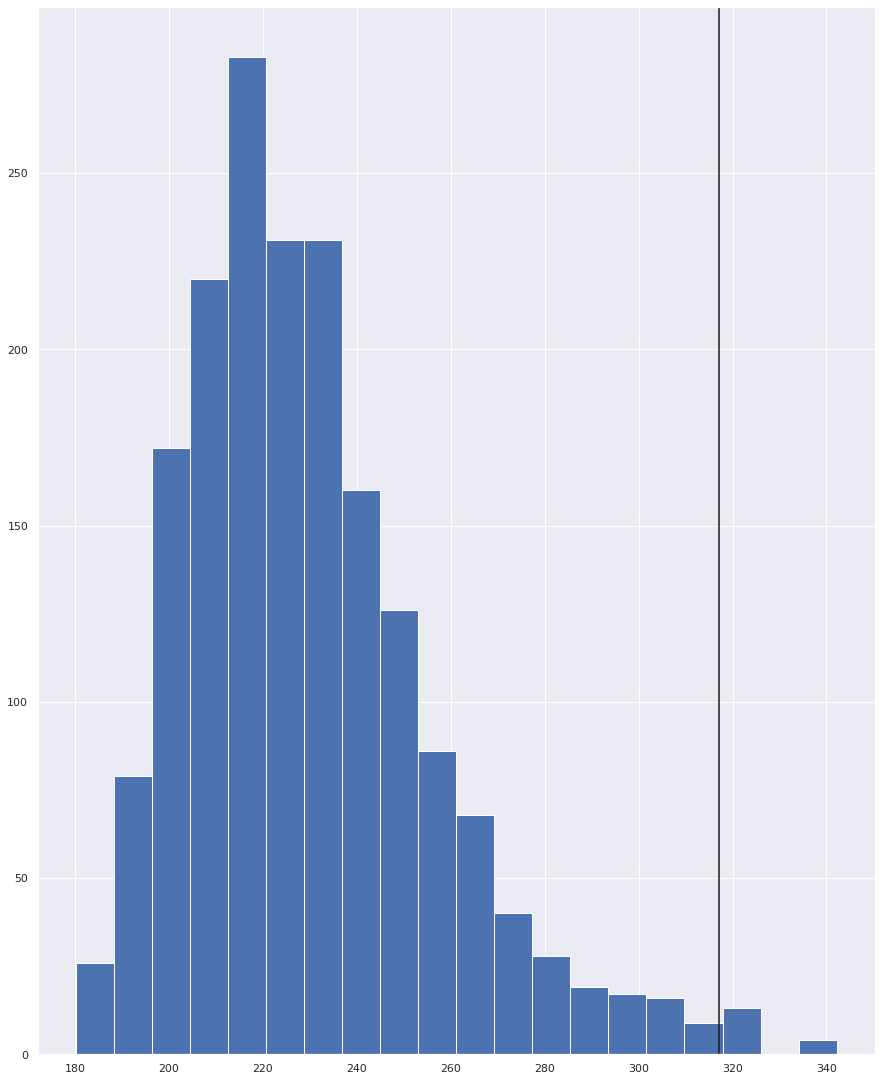

In [376]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()
#punti a destra della linea sono outliers
#distribution of outlier score

In [377]:
df_trainNORM = df_trainNORM.drop(columns = ['outlier_HBOS'])
clf.decision_function(df_trainNORM)

array([274.9950046 , 251.08228735, 250.02934194, ..., 235.954587  ,
       210.98585548, 223.94787266])

Approccio Depth - Based

Elliptic Envelope

In [378]:
from sklearn.covariance import EllipticEnvelope

In [379]:
ellenv = EllipticEnvelope(contamination= 0.01,random_state=42)
ellenv.fit(df_trainNORM)

/usr/local/lib/python3.9/dist-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1209.068047920738763 > -1335.665296375209891). You may want to try with a higher value of support_fraction (current value: 0.555).
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1199.625154204503133 > -1309.854116344250542). You may want to try with a higher value of support_fraction (current value: 0.555).
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(d

EllipticEnvelope(contamination=0.01, random_state=42)

In [380]:
outliers = ellenv.predict(df_trainNORM)

In [381]:
np.unique(outliers, return_counts=True)
#1 inliers #-1 outliers

(array([-1,  1]), array([  19, 1809]))

In [382]:
# save outlier scores to df
df_trainNORM['outlier_ELLIPTIC'] = outliers 
df_trainNORM['outlier_ELLIPTIC'] = df_trainNORM['outlier_ELLIPTIC'].apply(lambda x: 'inlier' if x==-1 else 'outlier')

df_copy_trainNORM['outlier_ELLIPTIC'] = outliers 
df_copy_trainNORM['outlier_ELLIPTIC'] = df_copy_trainNORM['outlier_ELLIPTIC'].apply(lambda x: 'inlier' if x==-1 else 'outlier')

In [383]:
df_trainNORM = df_trainNORM.drop(columns = ['outlier_ELLIPTIC'])

PCA per dimensionality reduction e visualizzazione outlier in 2 o 3d scatter plot

In [384]:
pca = PCA(39,random_state=42) 
pca.fit(df_trainNORM)
pca_proj = pca.transform(df_trainNORM)
df_pca = pd.DataFrame(pca_proj[:,:3], columns= ['pca1', 'pca2', 'pca3'])
df_pca

,pca1,pca2,pca3
0,-12.418257,-2.738985,-2.310122
1,-10.508605,0.321780,-0.706878
2,-11.018057,-0.193213,-1.888723
3,-10.655990,0.025034,1.028423
4,-9.913979,-1.057097,-4.302262
...,...,...,...
1823,-6.595232,-4.516833,-3.513606
1824,-2.535790,-8.614164,1.665203
1825,-4.986211,-7.011572,-1.273793
1826,-1.781558,-7.892693,-1.076716


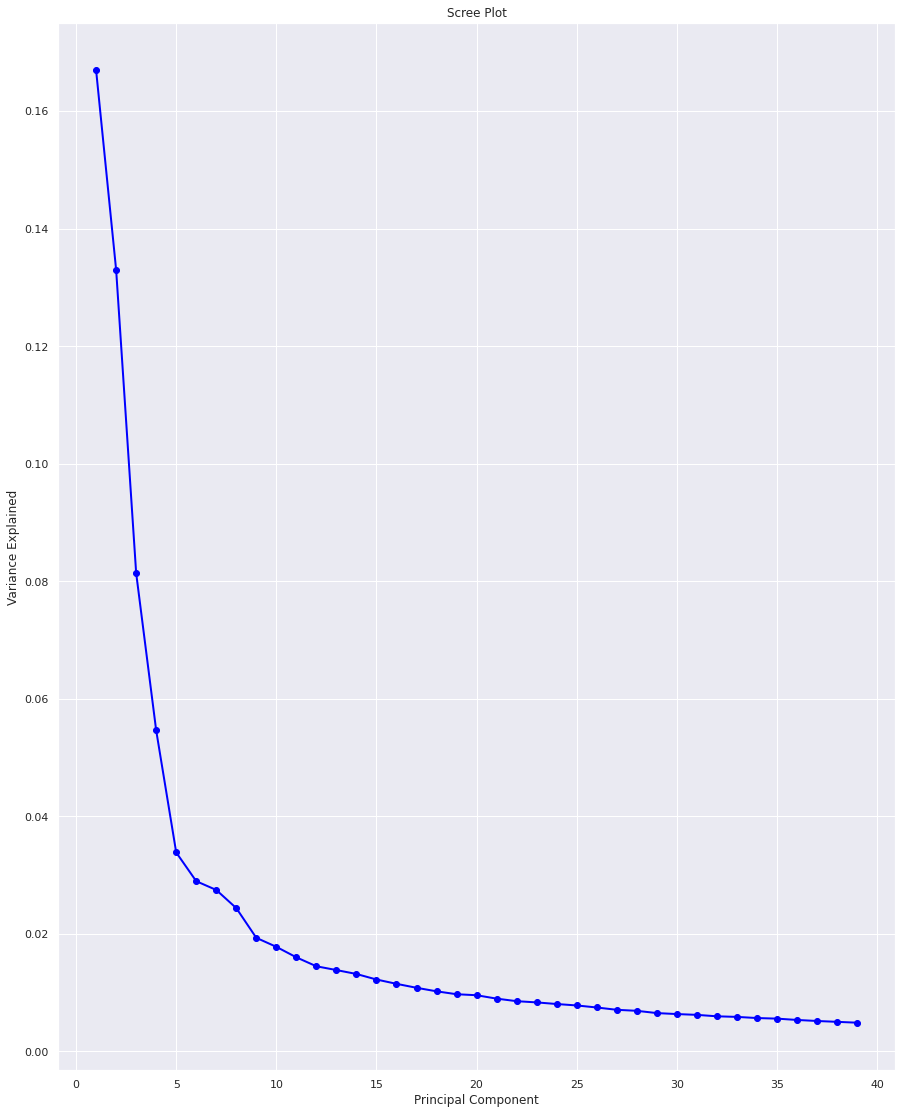

<Figure size 360x288 with 0 Axes>

In [385]:
import matplotlib.pyplot as plt
import numpy as np
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.figure(figsize=(5,4))
plt.show()

Text(0.5, 1.0, 'Data distribution in 2D')

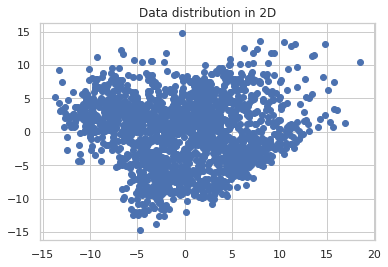

In [386]:
sns.set_style(style="whitegrid")
sns.set_color_codes()
plt.figure(figsize=(6,4))
plt.scatter(df_pca['pca1'],df_pca['pca2'])
plt.title('Data distribution in 2D')

Approccio Distance-Based 

KNN

In [387]:
from pyod.models.knn import KNN

In [388]:
clf = KNN(n_neighbors=50, contamination= 0.01)
clf.fit(df_trainNORM)

KNN(algorithm='auto', contamination=0.01, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=50, p=2,
  radius=1.0)

In [389]:
clf.decision_scores_

array([26.83526163, 12.56447691, 14.11220627, ..., 14.98339207,
       12.41929669, 14.23925619])

In [390]:
anomlay_score = clf.decision_function(df_trainNORM)

In [391]:
outliers = clf.predict(df_trainNORM)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1809,   19]))

In [392]:
df_trainNORM['outlier_KNN'] = outliers 
df_trainNORM['outlier_KNN'] = df_trainNORM['outlier_KNN'].apply(lambda x: 'inlier' if x==0 else 'outlier')

df_copy_trainNORM['outlier_KNN'] = outliers
df_copy_trainNORM['outlier_KNN'] = df_copy_trainNORM['outlier_KNN'].apply(lambda x: 'inlier' if x==0 else 'outlier')

<Axes: xlabel='pca1', ylabel='pca2'>

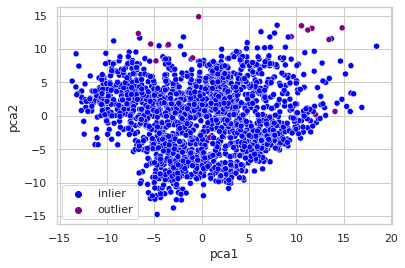

In [393]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='pca1', y='pca2', data=df_pca,  hue=df_trainNORM['outlier_KNN'].values, palette={'inlier':'blue', 'outlier':'purple'})

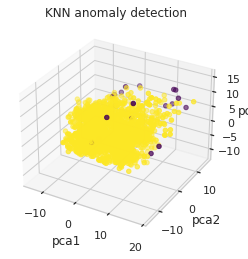

In [394]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca['pca1']
y = df_pca['pca2']
z = df_pca['pca3']
c = df_trainNORM['outlier_KNN'].apply(lambda x: -1 if x == 'outlier' else 1)

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='viridis')
ax.set_title('KNN anomaly detection')
plt.show()

In [395]:
df_trainNORM['outlier_KNN'].value_counts()

inlier     1809
outlier      19
Name: outlier_KNN, dtype: int64

Density Based Approach 

DBSCAN

In [396]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(eps= 5, metric='euclidean', min_samples=15, n_jobs=-1)

df_trainNORM = df_trainNORM.drop(columns = ['outlier_KNN'])
#clusters= outlier_detection.fit_predict(pca_proj)
clusters= outlier_detection.fit_predict(df_trainNORM)

In [397]:
clusters

array([-1, -1, -1, ..., -1, -1, -1])

In [398]:
# add column with outliers label
df_trainNORM['outlier_DBSCAN'] = clusters
df_trainNORM['outlier_DBSCAN'] = df_trainNORM['outlier_DBSCAN'].apply(lambda x: 'outlier' if x==-1 else 'inlier')

df_copy_trainNORM['outlier_DBSCAN'] = clusters
df_copy_trainNORM['outlier_DBSCAN'] = df_copy_trainNORM['outlier_DBSCAN'].apply(lambda x: 'outlier' if x==-1 else 'inlier')

<ipython-input-399-9b752ad850f5>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap= cm.get_cmap('Set1')


Text(0.5, 1.0, 'Anomaly Score - DBSCAN')

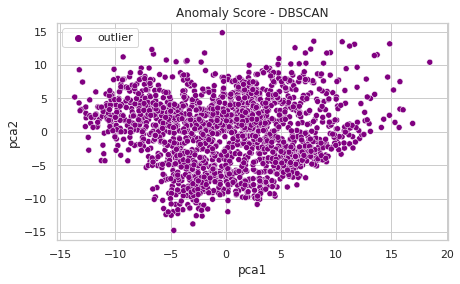

In [399]:
from matplotlib import cm
sns.set_style(style="whitegrid")
sns.set_color_codes()

plt.figure(figsize=(7,4))

cmap= cm.get_cmap('Set1')
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=df_trainNORM['outlier_DBSCAN'].values, palette={'inlier':'blue', 'outlier':'purple'})
plt.title('Anomaly Score - DBSCAN')

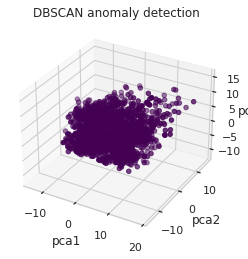

In [400]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca['pca1']
y = df_pca['pca2']
z = df_pca['pca3']
c = df_trainNORM['outlier_DBSCAN'].apply(lambda x: -1 if x == 'outlier' else 1)

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='viridis')
ax.set_title('DBSCAN anomaly detection')
plt.show()

In [401]:
df_trainNORM[df_trainNORM['outlier_DBSCAN'] =='outlier']['outlier_DBSCAN'].value_counts()

outlier    1828
Name: outlier_DBSCAN, dtype: int64

LOF

In [402]:
from sklearn.neighbors import LocalOutlierFactor

In [403]:
clf = LocalOutlierFactor(n_neighbors=150, contamination=0.01)
df_trainNORM = df_trainNORM.drop(columns = ['outlier_DBSCAN'], axis = 1)
outliers = clf.fit_predict(df_trainNORM)

In [404]:
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [405]:
# adding scores to df 
df_trainNORM['outlier_LOF'] = outliers
df_trainNORM['outlier_LOF'] = df_trainNORM['outlier_LOF'].apply(lambda x: 'inlier' if x==1 else 'outlier')

df_copy_trainNORM['outlier_LOF'] = outliers
df_copy_trainNORM['outlier_LOF'] = df_copy_trainNORM['outlier_LOF'].apply(lambda x: 'inlier' if x==1 else 'outlier')

In [406]:
df_trainNORM[['outlier_LOF']].value_counts()

outlier_LOF
inlier         1809
outlier          19
dtype: int64

In [407]:
#In this implementation of LOF outliers have a score close to -1, whereas inlier have a score close to +1.
clf.negative_outlier_factor_

array([-2.10685111, -1.09108621, -1.20575873, ..., -1.21260637,
       -1.06618544, -1.1640674 ])

In [408]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  19, 1809]))

In [409]:
#Inspecting outliers score
# maximum outlier score
np.max(clf.negative_outlier_factor_[np.where(outliers==-1)])

-2.2135118479879505

In [410]:
# minimum outlier score
np.min(clf.negative_outlier_factor_[np.where(outliers==-1)])

-3.9544843317864684

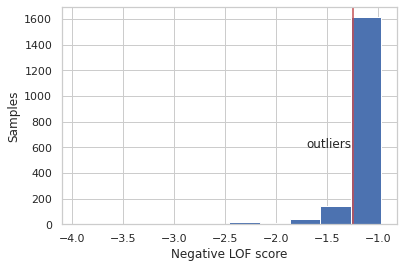

In [411]:
plt.figure(figsize=(6,4))
plt.hist(clf.negative_outlier_factor_, bins=10)
plt.axvline(-1.25, c='r')
plt.text(-1.7, 600, 'outliers')
plt.ylabel('Samples')
plt.xlabel('Negative LOF score')
plt.show()

<ipython-input-412-36d9d1b7b708>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap= cm.get_cmap('Set1')


Text(0.5, 1.0, 'Anomaly Score - LOF')

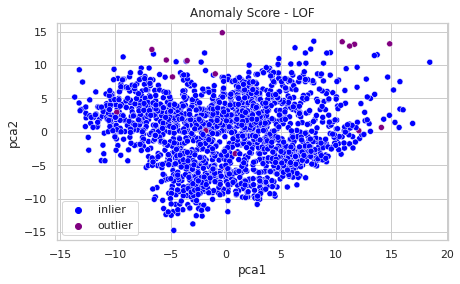

In [412]:
sns.set_style(style="whitegrid")
sns.set_color_codes()

plt.figure(figsize=(7,4))

cmap= cm.get_cmap('Set1')
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=df_trainNORM['outlier_LOF'].values, palette={'inlier':'blue', 'outlier':'purple'},c='k')
plt.title('Anomaly Score - LOF')

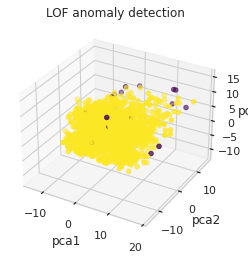

In [413]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca['pca1']
y = df_pca['pca2']
z = df_pca['pca3']
c = df_trainNORM['outlier_LOF'].apply(lambda x: -1 if x == 'outlier' else 1)

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='viridis')
ax.set_title('LOF anomaly detection')
plt.show()

Approcci High Dimensional

ABOD

In [414]:
#!pip install pyod

In [415]:
from pyod.models.abod import ABOD

In [416]:
clf = ABOD(n_neighbors=50, contamination= 0.01)
df_trainNORM = df_trainNORM.drop(columns=['outlier_LOF'], axis = 1)
clf.fit(df_trainNORM)

ABOD(contamination=0.01, method='fast', n_neighbors=50)

In [417]:
clf.decision_scores_

array([-1.92101358e-08, -1.91895560e-06, -2.50487423e-06, ...,
       -1.01143485e-06, -2.25448001e-06, -8.58052038e-07])

In [418]:
outliers = clf.predict(df_trainNORM)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1809,   19]))

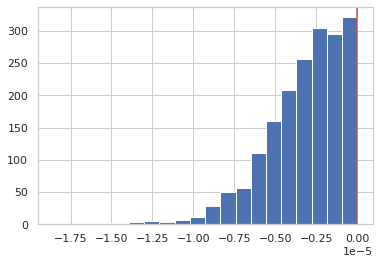

In [419]:
plt.figure(figsize=(6,4))
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='r')
plt.show()

In [420]:
# save outlier scores to df
df_trainNORM['outlier_ABOD'] = outliers 
df_trainNORM['outlier_ABOD'] = df_trainNORM['outlier_ABOD'].apply(lambda x: 'inlier' if x==0 else 'outlier')

df_copy_trainNORM['outlier_ABOD'] = outliers 
df_copy_trainNORM['outlier_ABOD'] = df_copy_trainNORM['outlier_ABOD'].apply(lambda x: 'inlier' if x==0 else 'outlier')

<Axes: xlabel='pca1', ylabel='pca2'>

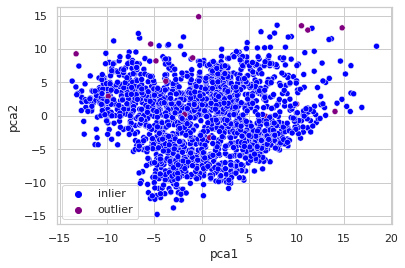

In [421]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=df_trainNORM['outlier_ABOD'].values, palette={'inlier':'blue', 'outlier':'purple'}, c='k')

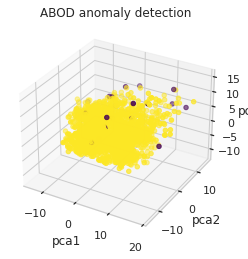

In [422]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca['pca1']
y = df_pca['pca2']
z = df_pca['pca3']
c = df_trainNORM['outlier_ABOD'].apply(lambda x: -1 if x == 'outlier' else 1)

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='viridis')
ax.set_title('ABOD anomaly detection')
plt.show()

In [423]:
df_trainNORM['outlier_ABOD'].value_counts()

inlier     1809
outlier      19
Name: outlier_ABOD, dtype: int64

  Approcci Model Based

Isolation Forest

We tested 2 libraries:

Sklearn IsolationForest
eif library
The eif library allow to build an Isolation forest and an Extended Isolation forest.
We will confront the results generated by the Isolation forest developed by sklearn and the one developed by eif.

In [424]:
#!pip install eif

In [425]:
import eif as iso
from sklearn.ensemble import IsolationForest

sns.set_style(style="whitegrid")
sns.set_color_codes()

F0 è la foresta di isolamento standard, che corrisponde al livello di estensione 0 nel contesto di EIF. F1 è la foresta di isolamento estesa con estensione 1, che nel caso di dati 2_D (come qui), è il caso completamente esteso.
F0_sk è la foresta di isolamento sviluppata in sklearn.

In [426]:
# transform data in an np.ndarray 
X_pca = np.array(pca_proj) 
df_trainNORM = df_trainNORM.drop(columns =['outlier_ABOD'], axis = 1)
X_fd= np.array(df_trainNORM)  #no dim reduction

Train Forest

Di seguito utilizziamo gli stessi valori per entrambe le foreste di isolamento ( sklern e eif) per confrontarle.

ntree = numero di alberi da utilizzare per l'adattamento della foresta//
sample_size = numero di righe da sottocampionare nella creazione di ciascun albero. Questo deve essere inferiore al numero di osservazioni nel set di dati

In [427]:
#----------------------------------- eif -----------------------------------------------------------#
# PCA REDUCTION FORESTS
F0  = iso.iForest(X_pca, ntrees=600, sample_size=256, ExtensionLevel=0) # ExtensionLevel=0 -> regular Isolation Forest
F1  = iso.iForest(X_pca, ntrees=600, sample_size=256, ExtensionLevel=1) # ExtensionLevel=1 -> Extended Isolation Forest

# FULL DIMENSIONALITY FORESTS
F0_fd =iso.iForest(X_fd, ntrees=600, sample_size=256, ExtensionLevel=0)
F1_fd =iso.iForest(X_fd, ntrees=600, sample_size=256, ExtensionLevel=1)

#----------------------------------- sklearn -----------------------------------------------------------#
F0_sk = IsolationForest(random_state=42, n_estimators=600, contamination=0.01).fit(X_fd) #isolation-forest sklearn version

In [428]:
xxx = np.array([[0,0.]])
SL0 = F0.compute_paths_single_tree(xxx, 0)

In [429]:
SL0[0]

14.375523260766274

In [430]:
F0.limit

8

Score data

In [431]:
# score isolation forest - sklearn
outliers_sk = F0_sk.predict(X_fd)

In [432]:
# Score the training data itself to see the distribution of the anomaly scores each point receives. 

# PCA reduction
S0 = F0.compute_paths(X_in=X_pca)
S1 = F1.compute_paths(X_in=X_pca)

# full dimensionality
S0_fd = F0_fd.compute_paths(X_in=X_fd)
S1_fd = F1_fd.compute_paths(X_in=X_fd)

eif - Isolation forests and Extended isolation forests

In [433]:
# PCA reduction
df_trainNORM['outlier_IF-PCA'] = S0
df_trainNORM['outlier_IF-PCA'] = df_trainNORM['outlier_IF-PCA'].apply(lambda x: 'inlier' if x<=0.6 else 'outlier')
df_trainNORM['outlier_EIF-PCA'] = S1
df_trainNORM['outlier_EIF-PCA'] = df_trainNORM['outlier_EIF-PCA'].apply(lambda x: 'inlier' if x<=0.6 else 'outlier')

df_copy_trainNORM['outlier_IF-PCA'] = S0
df_copy_trainNORM['outlier_IF-PCA'] = df_copy_trainNORM['outlier_IF-PCA'].apply(lambda x: 'inlier' if x<=0.6 else 'outlier')
df_copy_trainNORM['outlier_EIF-PCA'] = S1
df_copy_trainNORM['outlier_EIF-PCA'] = df_copy_trainNORM['outlier_EIF-PCA'].apply(lambda x: 'inlier' if x<=0.6 else 'outlier')

In [434]:
# Full dimensioality
df_trainNORM['outlier_IF'] = S0_fd
df_trainNORM['outlier_IF'] = df_trainNORM['outlier_IF'].apply(lambda x: 'inlier' if x<=0.6 else 'outlier')
df_trainNORM['outlier_EIF'] = S1_fd
df_trainNORM['outlier_EIF'] = df_trainNORM['outlier_EIF'].apply(lambda x: 'inlier' if x<=0.6 else 'outlier')

df_copy_trainNORM['outlier_IF'] = S0_fd
df_copy_trainNORM['outlier_IF'] = df_copy_trainNORM['outlier_IF'].apply(lambda x: 'inlier' if x<=0.6 else 'outlier')
df_copy_trainNORM['outlier_EIF'] = S1_fd
df_copy_trainNORM['outlier_EIF'] = df_copy_trainNORM['outlier_EIF'].apply(lambda x: 'inlier' if x<=0.6 else 'outlier')

sklearn - Isolation forests

In [435]:
# IsolationForest Sklearn
df_trainNORM['outlier_IF_sklearn'] = outliers_sk
df_trainNORM['outlier_IF_sklearn'] = df_trainNORM['outlier_IF_sklearn'].apply(lambda x: 'inlier' if x==1 else 'outlier')

df_copy_trainNORM['outlier_IF_sklearn'] = outliers_sk
df_copy_trainNORM['outlier_IF_sklearn'] = df_copy_trainNORM['outlier_IF_sklearn'].apply(lambda x: 'inlier' if x==1 else 'outlier')

check results

In [436]:
# sklearn IF
print('**** sklearn library *****')
df_trainNORM['outlier_IF_sklearn'].value_counts()

**** sklearn library *****


inlier     1809
outlier      19
Name: outlier_IF_sklearn, dtype: int64

In [437]:
# IF
print('**** eif library *****')
df_trainNORM['outlier_IF'].value_counts()
#We can see that sklearn is able to detect more anomalies than the model developed by eif !!!!!

**** eif library *****


inlier    1828
Name: outlier_IF, dtype: int64

In [438]:
# EIF
print('**** eif library *****')
df_trainNORM['outlier_EIF'].value_counts()

**** eif library *****


inlier    1828
Name: outlier_EIF, dtype: int64

In [439]:
# PCA - IF
print('**** eif library *****')
df_trainNORM['outlier_IF-PCA'].value_counts()

**** eif library *****


inlier     1809
outlier      19
Name: outlier_IF-PCA, dtype: int64

In [440]:
# PCA - EIF
print('**** eif library *****')
df_trainNORM['outlier_EIF-PCA'].value_counts()

**** eif library *****


inlier     1812
outlier      16
Name: outlier_EIF-PCA, dtype: int64

Plot anomaly scores

Text(0.5, 1.0, 'eif - Extended Isolation Tree (PCA)')

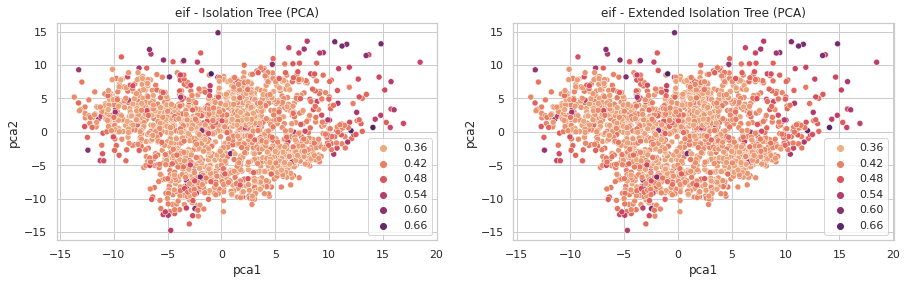

In [441]:
# ------- eif: Isolation Forest and Extended Isolation Forest - PCA projection ------------------------------#
f = plt.figure(figsize=(15,4))

ax1 = f.add_subplot(121)
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=S0,palette='flare')
plt.title('eif - Isolation Tree (PCA)')

ax2 = f.add_subplot(122)
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=S1,palette='flare')
plt.title('eif - Extended Isolation Tree (PCA)')

Text(0.5, 1.0, 'eif - Extended Isolation Tree (full-dim plotted in 2D)')

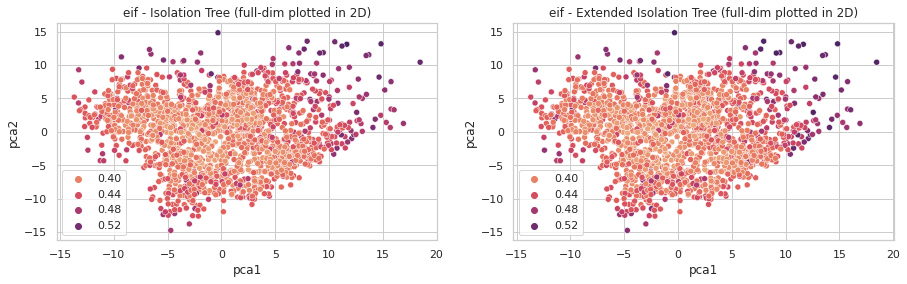

In [442]:
# ------- eif: Isolation Forest and Extended Isolation Forest - full dimensionality ------------------------------#
f = plt.figure(figsize=(15,4))

ax1 = f.add_subplot(121)
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=S0_fd,palette='flare')
plt.title('eif - Isolation Tree (full-dim plotted in 2D)')


ax2 = f.add_subplot(122)
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=S1_fd,palette='flare')
plt.title('eif - Extended Isolation Tree (full-dim plotted in 2D)')

Text(0.5, 1.0, 'Sklearn - Isolation Tree (full-dim plotted in 2D)')

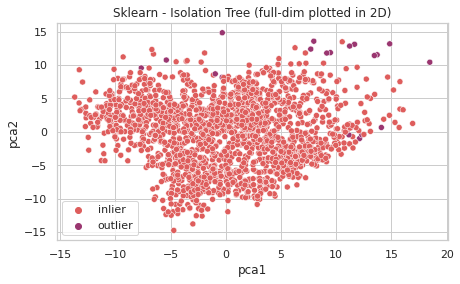

In [443]:
# ---------------- sklearn: Isolation Forest - full dimensionality -------------------------------------#

plt.figure(figsize=(7,4))

sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=df_trainNORM['outlier_IF_sklearn'].values ,palette='flare')
plt.title('Sklearn - Isolation Tree (full-dim plotted in 2D)')

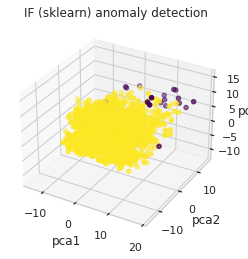

In [444]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca['pca1']
y = df_pca['pca2']
z = df_pca['pca3']
c = df_trainNORM['outlier_IF_sklearn'].apply(lambda x: -1 if x == 'outlier' else 1)

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='viridis')
ax.set_title('IF (sklearn) anomaly detection')
plt.show()

Anomaly Score Distribution.
Anomaly are scores with a value betwee 0 and 1.
The higher the score the more likely the observation is an outlier.

<ipython-input-445-791dd534bd7d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(S0, kde=True, color="b")
<ipython-input-445-791dd534bd7d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(S1, kde=True, color="b")


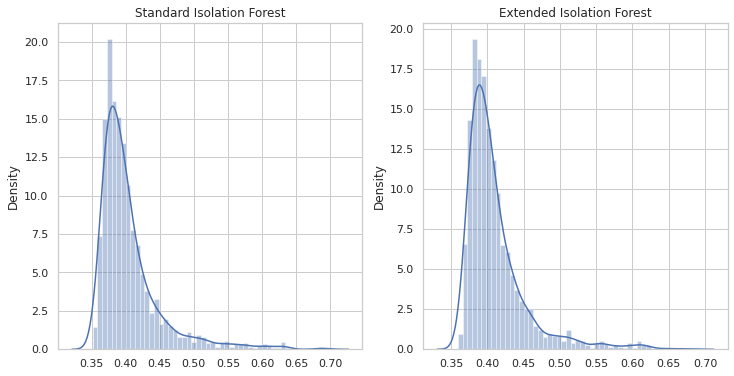

In [445]:
# Isolation forest with PCA - eif
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(S0, kde=True, color="b")
plt.title('Standard Isolation Forest')

# Extended Isolation forest with PCA - eif
plt.subplot(1,2,2)
sns.distplot(S1, kde=True, color="b")
plt.title('Extended Isolation Forest')
plt.show()

<ipython-input-446-7f93f88c4e19>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(S0_fd, kde=True, color="b")
<ipython-input-446-7f93f88c4e19>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(S1_fd, kde=True, color="b")


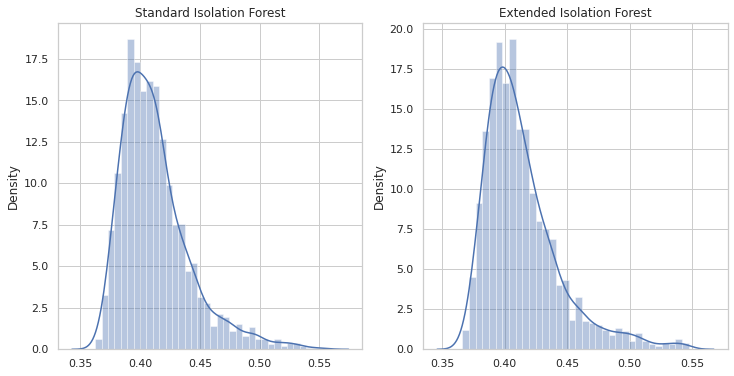

In [446]:
# Isolation forest full-dim - eif
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(S0_fd, kde=True, color="b")
plt.title('Standard Isolation Forest')

# Extended Isolation forest full-dim - eif
plt.subplot(1,2,2)
sns.distplot(S1_fd, kde=True, color="b")
plt.title('Extended Isolation Forest')
plt.show()

Ensamble Based Approach

LODA

In [447]:
from pyod.models.loda import LODA

In [448]:
clf = LODA(contamination = 0.01)
df_trainNORM = df_trainNORM.drop(columns = ['outlier_EIF', 'outlier_IF', 'outlier_IF_sklearn', 'outlier_IF-PCA', 'outlier_EIF-PCA'])
clf.fit(df_trainNORM)

LODA(contamination=0.01, n_bins=10, n_random_cuts=100)

In [449]:
outliers = clf.predict(df_trainNORM)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1809,   19]))

In [450]:
clf.decision_scores_

array([0.0299095 , 0.02371782, 0.02466217, ..., 0.02686902, 0.02184033,
       0.02478609])

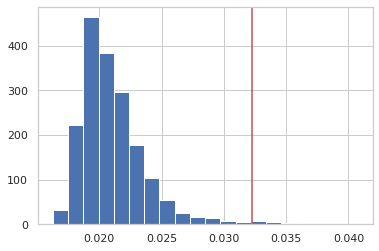

In [451]:
plt.figure(figsize=(6,4))
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='r')
plt.show()


In [452]:
# save outlier scores to df
df_trainNORM['outlier_LODA'] = outliers 
df_trainNORM['outlier_LODA'] = df_trainNORM['outlier_LODA'].apply(lambda x: 'inlier' if x==0 else 'outlier')

df_copy_trainNORM['outlier_LODA'] = outliers 
df_copy_trainNORM['outlier_LODA'] = df_copy_trainNORM['outlier_LODA'].apply(lambda x: 'inlier' if x==0 else 'outlier')


<Axes: xlabel='pca1', ylabel='pca2'>

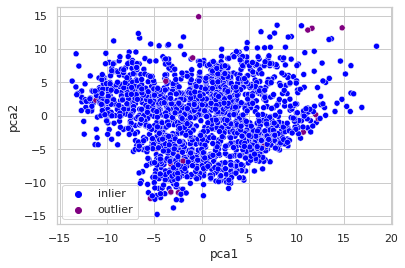

In [453]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue=df_trainNORM['outlier_LODA'].values, palette={'inlier':'blue', 'outlier':'purple'}, c='k')


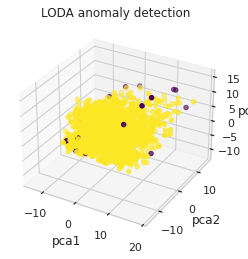

In [454]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca['pca1']
y = df_pca['pca2']
z = df_pca['pca3']
c = df_trainNORM['outlier_LODA'].apply(lambda x: -1 if x == 'outlier' else 1)

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='viridis')
ax.set_title('LODA anomaly detection')
plt.show()


In [455]:
df_trainNORM['outlier_LODA'].value_counts()

inlier     1809
outlier      19
Name: outlier_LODA, dtype: int64

Approcci statistici

Likelihood Approach

In [456]:
import numpy as np
from scipy import stats

In [457]:
df_trainNORM = df_trainNORM.drop(columns= ['outlier_LODA'])
data = np.array(df_trainNORM)

In [458]:
def norm_dist(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.e**(-((x-mu)**2)/(2*sigma**2))
              
def unif_dist(x, n):
    return 1/n

In [459]:
M = np.copy(data)
A = list()
muM = np.mean(M)
sigmaM = np.std(M)

In [460]:
norm_dist(15, muM, sigmaM)

3.458471206305943e-50

In [461]:
M = np.copy(data)
A = []
lambda_par = 0.3

muM = np.mean(M)
sigmaM = np.std(M)
sizeA = len(A)

sumM = np.sum([norm_dist(x, muM, sigmaM) for x in M])

sumA = np.sum([unif_dist(x, sizeA) for x in A])

ll = (len(M) * np.log(1-lambda_par) + sumM + len(A) * np.log(lambda_par) + sumA)

In [462]:
M = np.copy(data)
A = []
B = []
c = 0.2
for i, x in enumerate(data):
    A.append(x)
    M = np.array([xo for j, xo in enumerate(data) if i!=j])
    muM = np.mean(M)
    sigmaM = np.std(M)
    sizeA = len(A)
    sumM = np.sum([norm_dist(x, muM, sigmaM) for x in M])
    sumA = np.sum([unif_dist(x, sizeA) for x in A])
    ll_xi = (len(M) * np.log(1-lambda_par) + sumM + len(A) * np.log(lambda_par) + sumA)
    delta_ll = abs(ll - ll_xi)
    print(i, delta_ll, 'outlier' if delta_ll > c else 'inlier')
    M = np.copy(data)
    A = list()

0 12.783104557616753 outlier
1 51.117957599883084 outlier
2 44.56287753643119 outlier
3 52.939663841883885 outlier
4 52.59778664789337 outlier
5 45.63056041256641 outlier
6 53.95099545941048 outlier
7 48.438408999034436 outlier
8 3.250670636582072 outlier
9 55.527114530981635 outlier
10 62.6115862000006 outlier
11 56.34864428838773 outlier
12 63.918052924986114 outlier
13 60.77938624829403 outlier
14 65.23427483293926 outlier
15 65.15443133201916 outlier
16 78.59457806280989 outlier
17 75.4602949648106 outlier
18 82.04279428225709 outlier
19 72.50545190833509 outlier
20 61.31435930900625 outlier
21 58.28320652387629 outlier
22 39.85374049603706 outlier
23 46.46543047197338 outlier
24 59.47752740884607 outlier
25 54.80032076101634 outlier
26 61.890788206568686 outlier
27 59.66624364141899 outlier
28 73.42850268812617 outlier
29 77.61300211811613 outlier
30 74.27927335757704 outlier
31 79.12642415252049 outlier
32 47.35306654522719 outlier
33 13.000266772534815 outlier
34 55.750318239210

prova che è il dataset sia stato modificato correttamente

In [463]:
df_copy_trainNORM.head()

,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_q25,lag1_kur,...,outlier_KNN,outlier_DBSCAN,outlier_LOF,outlier_ABOD,outlier_IF-PCA,outlier_EIF-PCA,outlier_IF,outlier_EIF,outlier_IF_sklearn,outlier_LODA
0,0.014359,-0.780862,0.603864,-0.063106,-0.7693,0.553248,2.240420,0.027433,0.721621,0.242969,...,inlier,outlier,inlier,inlier,outlier,inlier,inlier,inlier,inlier,inlier
1,0.011053,-0.767068,0.603864,-0.063106,-0.7693,0.770118,2.458241,0.027433,0.721621,-0.028555,...,inlier,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
2,0.014884,-0.728019,0.622665,-0.063106,-0.7693,0.851346,3.056536,-0.048433,0.721621,0.320045,...,inlier,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
3,0.013772,-0.737654,0.603864,-0.063106,-0.7693,1.562804,4.240412,-0.010500,0.721621,0.277297,...,inlier,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
4,0.013562,-0.831819,0.603864,-0.063106,-0.7693,0.286970,1.604752,-0.010500,0.721621,0.034581,...,inlier,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier


Removing Outliers (only from train)

Sulla base dei punteggi forniti da ciascun metodo di rilevamento dei valori anomali, effettueremo una votazione a maggioranza per determinare se un punto x è un valore anomalo o un valore inlier.

In [482]:
# majority voting
mostCommonVote=[]
for row in df_copy_trainNORM[['outlier_DBSCAN','outlier_LOF','outlier_ABOD','outlier_IF_sklearn','outlier_LODA','outlier_KNN', 'outlier_HBOS', 'outlier_ELLIPTIC']].values:
    votes, values = np.unique(row, return_counts=True)
    if np.all(values<=1):
            mostCommonVote.append( row[0] )
    else:
        mostCommonVote.append( votes[np.argmax(values)] )

df_copy_trainNORM['Winner'] = mostCommonVote

In [483]:
df_copy_trainNORM[['Winner']].value_counts()

Winner 
inlier     1809
outlier      19
dtype: int64

In [537]:
# check if that anomalous value of sum has been detected as outlier
#lag1_sum_w1 --> se < -1 solo il record 382 e 1281 sono stati definiti come outlier dalla maggioranza delle tecniche
#per >1, >5 e < -5 --> nessun record definito come outlier dalla maggioranza delle tecniche
#per >0 --> 14 outliers
#per < 0 --> 5 outliers

df_copy_trainNORM[(df_copy_trainNORM['lag1_sum_w1'] < 0) & (df_copy_trainNORM['Winner'] == 'outlier')]

,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_q25,lag1_kur,...,outlier_DBSCAN,outlier_LOF,outlier_ABOD,outlier_IF-PCA,outlier_EIF-PCA,outlier_IF,outlier_EIF,outlier_IF_sklearn,outlier_LODA,Winner
42,0.281838,2.091123,-0.787410,-0.063106,0.552936,0.417530,1.362026,-25.691302,-1.885167,-0.627889,...,outlier,inlier,outlier,inlier,inlier,inlier,inlier,inlier,inlier,outlier
382,-0.076366,-0.235076,-0.731007,-0.063106,1.957812,-1.003460,-0.504428,0.027433,-0.937244,-0.204639,...,outlier,outlier,outlier,outlier,outlier,inlier,inlier,outlier,inlier,outlier
589,-0.027825,-0.624129,-0.148176,-0.063106,0.366996,-1.029074,0.274512,0.065366,-0.107811,-0.369728,...,outlier,outlier,inlier,outlier,outlier,inlier,inlier,inlier,outlier,outlier
1281,-0.162362,1.446889,0.002232,-0.063106,-0.190822,0.111646,0.289180,0.027433,0.247660,-0.397943,...,outlier,outlier,outlier,inlier,inlier,inlier,inlier,inlier,inlier,outlier
1702,0.997729,0.173599,-1.727461,-8.111372,1.751212,1.377952,0.426434,-1.338163,0.366150,-0.243313,...,outlier,outlier,outlier,outlier,outlier,inlier,inlier,outlier,outlier,outlier


In [491]:
# check if that anomalous value of sum has been detected as outlier
#provato sia con -10, sia con >10, sia con -1 sia con 1
df_copy_trainNORM[df_copy_trainNORM['sum']< -10]

,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_q25,lag1_kur,...,outlier_DBSCAN,outlier_LOF,outlier_ABOD,outlier_IF-PCA,outlier_EIF-PCA,outlier_IF,outlier_EIF,outlier_IF_sklearn,outlier_LODA,Winner
1496,-16.243582,0.323305,-0.5994,-0.063106,-0.128842,0.601504,-1.364108,-0.2381,0.484641,0.110158,...,outlier,outlier,outlier,outlier,outlier,inlier,inlier,inlier,inlier,outlier


Plot in 3D the average outlier score

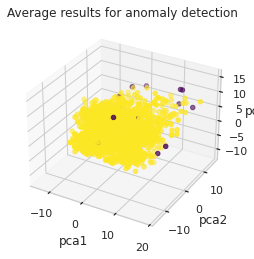

In [467]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca['pca1']
y = df_pca['pca2']
z = df_pca['pca3']
c = df_copy_trainNORM['Winner'].apply(lambda x: -1 if x == 'outlier' else 1)

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='viridis')
ax.set_title('Average results for anomaly detection')
plt.show()

comprensione outliers segnalati come tali dalla maggioranza

In [518]:
df_copy_trainNORM[(df_copy_trainNORM['Winner'] == 'outlier') & (df_copy_trainNORM['happy'] == 0)]
#16 outlier quando happy = 0 #la maggior parte con calm e fearful
#3 outlier quando happy = 1 (quindi è happy l'emozione)
#totale 19 outlier

,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_q25,lag1_kur,...,outlier_DBSCAN,outlier_LOF,outlier_ABOD,outlier_IF-PCA,outlier_EIF-PCA,outlier_IF,outlier_EIF,outlier_IF_sklearn,outlier_LODA,Winner
42,0.281838,2.091123,-0.787410,-0.063106,0.552936,0.417530,1.362026,-25.691302,-1.885167,-0.627889,...,outlier,inlier,outlier,inlier,inlier,inlier,inlier,inlier,inlier,outlier
292,-0.086039,1.136582,-5.431259,-0.063106,6.358379,-0.857901,0.544785,9.017611,-2.477619,-0.700400,...,outlier,outlier,outlier,outlier,outlier,inlier,inlier,outlier,outlier,outlier
308,-0.049486,0.964802,-4.566413,16.033425,4.700419,-0.618991,0.147957,-3.727957,-2.951580,-0.509121,...,outlier,outlier,inlier,outlier,outlier,inlier,inlier,outlier,outlier,outlier
311,2.077170,1.313484,-5.186846,16.033425,5.325382,-0.543338,-0.133146,4.996687,-3.188561,-0.501673,...,outlier,outlier,outlier,outlier,outlier,inlier,inlier,outlier,outlier,outlier
361,-0.025506,0.163926,0.566262,-0.063106,-0.583361,0.553865,-0.086801,0.027433,0.603131,0.597099,...,outlier,outlier,outlier,outlier,outlier,inlier,inlier,inlier,inlier,outlier
382,-0.076366,-0.235076,-0.731007,-0.063106,1.957812,-1.003460,-0.504428,0.027433,-0.937244,-0.204639,...,outlier,outlier,outlier,outlier,outlier,inlier,inlier,outlier,inlier,outlier
589,-0.027825,-0.624129,-0.148176,-0.063106,0.366996,-1.029074,0.274512,0.065366,-0.107811,-0.369728,...,outlier,outlier,inlier,outlier,outlier,inlier,inlier,inlier,outlier,outlier
942,-0.014646,-0.182866,0.415854,-0.063106,-0.418081,-0.891494,-0.724870,0.065366,-0.463282,0.531426,...,outlier,outlier,outlier,outlier,outlier,inlier,inlier,inlier,inlier,outlier
1281,-0.162362,1.446889,0.002232,-0.063106,-0.190822,0.111646,0.289180,0.027433,0.247660,-0.397943,...,outlier,outlier,outlier,inlier,inlier,inlier,inlier,inlier,inlier,outlier
1296,-0.021790,-0.673050,0.566262,-0.063106,-0.727980,0.721379,0.609955,-0.048433,0.603131,19.033090,...,outlier,outlier,outlier,inlier,inlier,inlier,inlier,inlier,inlier,outlier


In [538]:
print(df_train.loc[1704:1720, ['emotion', 'emotional_intensity']])

        emotion emotional_intensity
1704    fearful              strong
1705    fearful              strong
1706    fearful              strong
1707    fearful              strong
1708    disgust              normal
1709    disgust              normal
1710    disgust              normal
1711    disgust              normal
1712    disgust              strong
1713    disgust              strong
1714    disgust              strong
1715    disgust              strong
1716  surprised              normal
1717  surprised              normal
1718  surprised              normal
1719  surprised              normal
1720  surprised              strong


rimozione outliers

In [539]:
df_without_outliers = df_copy_trainNORM.drop(index=df_copy_trainNORM[df_copy_trainNORM['Winner']=='outlier'].index, axis=0)

In [549]:
df_without_outliers.shape

(1809, 211)

In [544]:
df_copy_trainNORM

,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_q25,lag1_kur,...,outlier_DBSCAN,outlier_LOF,outlier_ABOD,outlier_IF-PCA,outlier_EIF-PCA,outlier_IF,outlier_EIF,outlier_IF_sklearn,outlier_LODA,Winner
0,0.014359,-0.780862,0.603864,-0.063106,-0.76930,0.553248,2.240420,0.027433,0.721621,0.242969,...,outlier,inlier,inlier,outlier,inlier,inlier,inlier,inlier,inlier,inlier
1,0.011053,-0.767068,0.603864,-0.063106,-0.76930,0.770118,2.458241,0.027433,0.721621,-0.028555,...,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
2,0.014884,-0.728019,0.622665,-0.063106,-0.76930,0.851346,3.056536,-0.048433,0.721621,0.320045,...,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
3,0.013772,-0.737654,0.603864,-0.063106,-0.76930,1.562804,4.240412,-0.010500,0.721621,0.277297,...,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
4,0.013562,-0.831819,0.603864,-0.063106,-0.76930,0.286970,1.604752,-0.010500,0.721621,0.034581,...,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,-0.017837,-0.712651,0.622665,-0.063106,-0.74864,-0.713004,-0.755863,0.027433,0.603131,-0.055036,...,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
1824,-0.016247,-0.547265,0.603864,-0.063106,-0.74864,-0.237333,0.043934,0.027433,0.603131,0.635778,...,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
1825,-0.023909,-0.491381,0.622665,-0.063106,-0.74864,-0.806583,0.162332,0.027433,0.603131,0.395388,...,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
1826,-0.010464,-0.379754,0.603864,-0.063106,-0.70732,-1.013416,-0.017237,0.027433,0.603131,-0.208016,...,outlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier


salvataggio dataset senza outliers

In [545]:
#salvo dataset di train senza l'1% degli outlier
df_train = df_train.assign(outlier_detection = df_copy_trainNORM['Winner'].values)

In [546]:
df_train.shape

(1828, 205)

In [547]:
df_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,filename,sum,std,q25,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,outlier_detection
0,speech,neutral,normal,Kids are talking by the door,1st,M,03-01-01-01-01-01-01.wav,0.145081,0.004001,-0.000031,...,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,1.0,6.742190,-1.706215,inlier
1,speech,neutral,normal,Kids are talking by the door,2nd,M,03-01-01-01-01-02-01.wav,0.114319,0.004283,-0.000031,...,-0.096686,-1.100390,705.975006,0.744699,0.163183,0.270133,1.0,-0.700420,-0.201495,inlier
2,speech,neutral,normal,Dogs are sitting by the door,1st,M,03-01-01-01-02-01-01.wav,0.149963,0.005084,0.000000,...,16.082550,-3.120218,694.365924,0.751478,0.190634,0.000000,1.0,1.688986,-1.024773,inlier
3,speech,neutral,normal,Dogs are sitting by the door,2nd,M,03-01-01-01-02-02-01.wav,0.139618,0.004886,-0.000031,...,-0.332682,-0.880988,663.205667,0.736895,0.182551,0.205616,1.0,-0.594111,-0.412871,inlier
4,speech,calm,normal,Kids are talking by the door,1st,M,03-01-02-01-01-01-01.wav,0.137665,0.002956,-0.000031,...,0.054656,-1.071109,741.412796,0.744390,0.177069,0.177847,1.0,0.126535,-0.620782,inlier


In [548]:
df_train[df_train['outlier_detection'] == 'outlier']

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,filename,sum,std,q25,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,outlier_detection
42,speech,fearful,strong,Dogs are sitting by the door,1st,M,03-01-06-02-02-01-01.wav,2.633728,0.062859,-0.002289,...,-0.931744,0.512355,622.913971,0.552229,0.249571,0.094757,1.000000,-0.961270,0.331694,outlier
223,speech,happy,normal,Dogs are sitting by the door,2nd,M,03-01-03-01-02-02-03.wav,-0.198608,0.011298,-0.000183,...,-1.631263,0.181725,584.928377,0.587277,0.256471,0.035549,1.000000,-1.114115,0.025413,outlier
292,song,sad,strong,Kids are talking by the door,1st,M,03-02-04-02-01-01-03.wav,-0.789032,0.043296,-0.009827,...,0.198374,0.964198,960.293330,0.727495,0.302186,0.007145,1.000000,0.265560,-1.229529,outlier
308,song,fearful,strong,Kids are talking by the door,1st,M,03-02-06-02-01-01-03.wav,-0.448944,0.039776,-0.008423,...,-0.389714,0.555815,735.171122,0.631590,0.260384,0.025929,1.000000,-0.968199,-0.275843,outlier
311,song,fearful,strong,Dogs are sitting by the door,2nd,M,03-02-06-02-02-02-03.wav,19.337646,0.046922,-0.009430,...,-1.008301,0.145695,714.200125,0.613574,0.276373,0.025014,1.000000,-1.195729,-0.167501,outlier
361,speech,disgust,strong,Kids are talking by the door,2nd,F,03-01-07-02-01-02-04.wav,-0.225830,0.023363,-0.000092,...,2.108486,-1.606205,736.135297,0.645733,0.250565,0.050505,1.000000,-0.625791,-0.506131,outlier
382,song,calm,strong,Dogs are sitting by the door,1st,F,03-02-02-02-02-01-04.wav,-0.699036,0.015186,-0.002197,...,0.520444,1.207010,165.123621,0.098995,0.247392,0.000000,0.839625,6.294618,2.725187,outlier
589,song,calm,strong,Kids are talking by the door,2nd,F,03-02-02-02-01-02-06.wav,-0.247406,0.007213,-0.001251,...,3.238150,1.726463,165.984055,0.092832,0.244130,0.000000,0.858079,7.127631,2.880807,outlier
942,speech,calm,normal,Dogs are sitting by the door,1st,F,03-01-02-01-02-01-10.wav,-0.124786,0.016256,-0.000336,...,2.329200,-1.437761,507.551407,0.491813,0.277242,0.047301,1.000000,-0.983272,0.494602,outlier
1160,speech,happy,strong,Kids are talking by the door,1st,F,03-01-03-02-01-01-12.wav,4.831329,0.040572,-0.000916,...,-0.981734,-0.220750,905.852355,0.762502,0.219883,0.047365,1.000000,1.325935,-1.310857,outlier


In [550]:
df_train = df_train.drop(index=df_train[df_train['outlier_detection']=='outlier'].index, axis=0)

In [551]:
df_train.shape

(1809, 205)

In [552]:
#salvo in file csv
df_train.to_csv('Train_NOoutliers')